# Fig 5: Vibration of individual afferents

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

from directory_paths import SAVE_DIR
from train.train_model_utils import *
from utils.analysis_plots_helper import *

In [2]:
original_hex_biceps = "#FF3B30"
original_hex_tri = "#00C7BE"
MARKER_LIST = ["o", "X", "^", "p", "d", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]

aff_Ia_color = "#762A83"
aff_II_color = "#DE8F05"
colors_aff_dict = {"i_a": aff_Ia_color, "ii": aff_II_color}

set_publication_style()

# Panel A: Vib individual channels inputs and illusion example

- Load coef seed 1, all train seeds: vib_vary_ia_subChannels and vib_vary_multipleFs_sumNonVibInput, vibration of TRIlat

- Plot input vs vib freq for each type Ia afferent averaged over train seeds
- Plot vib angle diff vs vib freq for vibration of individual afferents and all afferents
- Markers per afferent

In [3]:
### Load directly from downloaded figure data if available 
num_vib_muscles = 1
num_cols = 11
test_exp_dir = "vib_vary_ia_subChannels"
coef_seeds_to_load = ['1']
df_file_path = os.path.join(
    SAVE_DIR,
    "data_for_figs", 
    f"df_seed-{coef_seeds_to_load[0]}_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.pkl")

### Or load from vibration experiments directly
n_aff = 5
task = "letter_reconstruction_joints"

## For pre-trained models downloaded
train_seeds_to_load = ['0','1','2','9']
model_path = os.path.join(
    SAVE_DIR,
    f"trained_models/experiment_causal_flag-pcr_optimized_linear_extended_{n_aff}_{n_aff}_{task}/",
)
INPUT_DATA = "ES3D"
test_exp_dirs = [ "vib_vary_multipleFs_vib_ia_only", "vib_vary_ia_subChannels"]
PATH_TO_SAVE = model_path + "/" + "test" + "/" + INPUT_DATA + "/" + test_exp_dir

# vib_muscles = ["TRIlat", "BIClong"] # all containing that muscle 
vib_muscles = ["TRIlat"] # all containing that muscle 
vib_range = "0-190Hz"

columns_to_load = ["vib_freq", "vib_muscles", "trial", "elbow_angle", "vib_angle_diff_elbow"]
columns_to_load = columns_to_load + ["inputs_vib"]

path_save = model_path + "/plots/" + test_exp_dir
if not os.path.exists(path_save):
    os.makedirs(path_save)
    print("created directory ", path_save)

created directory  /media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_ia_subChannels


## Load data

In [4]:
# df_file_path = "none"
loaded_from_hdf = False

# load data 
if os.path.exists(df_file_path):
    print("loading df_all from ", df_file_path)
    # df_all = pd.read_hdf(df_file_path, key="df", mode="r")
    df_all = pd.read_pickle(df_file_path)
    loaded_from_hdf = True
else:
    df_all = pd.DataFrame()
    for test_exp_dir in test_exp_dirs:
        print(test_exp_dir)
        df_dir = load_vibration_data(
            model_path=model_path,
            test_exp_dir=test_exp_dir,
            vib_muscles=vib_muscles,
            vib_range=vib_range,
            columns_to_load=columns_to_load,
            coef_seeds_to_load=coef_seeds_to_load,
            train_seeds_to_load=train_seeds_to_load,
            input_data=INPUT_DATA,
            sample_rate=SAMPLE_RATE,
            exact_vib_muscles=True,
            addChannels=True
        )
        df_all = pd.concat([df_all, df_dir], ignore_index=True)

loading df_all from  /media/data16/adriana/ProprioPerception/0_Zenodo/data_for_figs/df_seed-1_vib_vary_ia_subChannels_1Muscles_numCols-11.pkl


In [6]:
### Check data is correct 
# remove rows with same coef_seed, train_seed, vib_musclse_str, vib_freq and trial
df_all_f = df_all.drop_duplicates(subset=["coef_seed", "train_seed", "vib_muscles_str", "vib_freq", "trial", "channels"], keep="first")

unique_channels = df_all_f["channels"].unique()
print(unique_channels)

# take only rows with inputs_vib for this example figure
df_all_no_nan = df_all_f.dropna(subset=["inputs_vib"])

## Print summary of data to make sure it is correct
# for channel in unique_channels:
#     print(channel)
#     df_all_ff = df_all_no_nan[df_all_no_nan["channels"] == channel]
#     print(summarize_dataframe(df_all_ff))

['0_1_2_3_4' '0' '1' '2' '4' '3']


In [7]:
df_all = df_all_f
df_all.head()

,vib_freq,trial,elbow_angle,vib_angle_diff_elbow,inputs_vib,seed_path,coef_seed,train_seed,channels,vib_muscles_str
0,0,0,59.754978,0.0,NaN,spatiotemporal_4_8-8-32-64_7171_1_0,1,0,0_1_2_3_4,TRIlat
1,0,1,60.563911,0.0,NaN,spatiotemporal_4_8-8-32-64_7171_1_0,1,0,0_1_2_3_4,TRIlat
2,0,2,116.971245,0.0,NaN,spatiotemporal_4_8-8-32-64_7171_1_0,1,0,0_1_2_3_4,TRIlat
3,0,3,82.039864,0.0,NaN,spatiotemporal_4_8-8-32-64_7171_1_0,1,0,0_1_2_3_4,TRIlat
4,0,4,55.383911,0.0,"[[[4.865313, 4.8653126, 4.865312, 4.8653116, 4...",spatiotemporal_4_8-8-32-64_7171_1_0,1,0,0_1_2_3_4,TRIlat


In [8]:
# save df
if not loaded_from_hdf:
    num_cols = len(df_all.columns)
    num_vib_muscles = len(df_all["vib_muscles_str"].unique())
    # df_file_path = model_path + f"/df_seed-{coef_seeds_to_load[0]}_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5"
    df_file_path = model_path + f"/df_seed-{coef_seeds_to_load[0]}_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.pkl"
    # save df_all to file
    # df_all.to_hdf(df_file_path, key="df", mode="w",format="table")
    df_all.to_pickle(df_file_path)
    print("saved df_all to ", df_file_path)


In [9]:
unique_seeds = df_all["coef_seed"].unique()
unique_seeds.sort()
seed_marker_map = {seed: MARKER_LIST[i] for i, seed in enumerate(unique_seeds)}
df_all["vib_muscles_str"].unique()

array(['TRIlat'], dtype=object)

In [10]:
path_save

'/media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_ia_subChannels'

## Plots

In [11]:
train_seed = str(1)
aff_marker_map = {
    '0': "o",
    '1': "X",
    '2': "^",
    '3': "p",
    '4': "d",
    '0_1_2_3_4': "*",
}

ls_map = {
    '0': "-.",
    '1': "-.",
    '2': "-.",
    '3': "-.",
    '4': "-.",
    '0_1_2_3_4': "-",
}

coef_seed = coef_seeds_to_load[0]
vib_m_str_to_plot = df_all["vib_muscles_str"].unique()
unique_channels = df_all["channels"].unique()

### Illusion per vibrated afferent

In [14]:

def plot_angleOffset_vs_vibration(
    df, save_path, color, suffix="", col_name="vib_angle_diff_elbow", per_seed=None, ylim=None, group_by=["trial", "vib_freq"], seed_marker_map = seed_marker_map, ls_map=None, maxLine=False, figsize=BASE_FIG_SIZE_1COL
):
    """
    Plot 'offset_n_v_vib' and 'vib_angle_diff' vs. vibration frequency,
    with improved visuals:
    - Jittered scatter plot
    - Triangular markers
    - Thin lines connecting trials
    - A thick line representing the mean

    Args:
        df (pd.DataFrame): DataFrame containing trial results.
        save_path (str): Directory to save the generated plot.
        color (str): Color for the markers and lines.
        suffix (str): Suffix for the filename of the saved plot.
    """
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    jitter_strength = 3  # Adjust this value for more or less jitter
    
    if per_seed is not None:
        # Loop over each unique training_seed and assign a unique marker
        unique_seeds = df[per_seed].unique()
        # unique_seeds.sort()
        grad = generate_color_gradient(color, num_shades=len(unique_seeds))
        for i, seed in enumerate(unique_seeds):
            seed_data = df[df[per_seed] == seed]

            # Compute the mean value of col_name for each (trial, vib_freq) combination
            aggregated_data = (
                seed_data.groupby(group_by)
                .agg(col_name_mean=(col_name, "mean"))
                .reset_index()
            )

            # Add jitter to vibration frequencies for better visualization
            if len(aggregated_data["vib_freq"]) == len(aggregated_data["vib_freq"].unique()):
                jittered_freqs = aggregated_data["vib_freq"]
                s=MS_BIG
            else:
                jittered_freqs = aggregated_data["vib_freq"] + np.random.uniform(
                    -jitter_strength, jitter_strength, size=len(aggregated_data)
                )
                s=MS

            
            marker = seed_marker_map[seed]
            # Scatter plot
            ax.scatter(
                jittered_freqs,  # Jittered vibration frequencies
                aggregated_data[
                    "col_name_mean"
                ],  # Mean value of col_name for each trial and vib_freq
                color=grad[i],
                edgecolor="black",
                alpha=ALPHA,
                marker=marker,  
                s=s,
                label=f"{per_seed} {seed}",
            )
            if ls_map is None:
                ls = '-'
            else:
                ls = ls_map[seed]
            # plot the mean of the plotted data
            ax.plot(
                aggregated_data["vib_freq"].unique(),
                aggregated_data.groupby("vib_freq")["col_name_mean"].mean(),
                color=grad[i],
                ls=ls,
                lw=LW,
            )
        ax.legend()
    else:
        # Compute the mean value of col_name for each (trial, vib_freq) combination
        aggregated_data = (
            df.groupby(["trial", "vib_freq"])
            .agg(col_name_mean=(col_name, "mean"))
            .reset_index()
        )

        # Add jitter to vibration frequencies for better visualization
        jittered_freqs = aggregated_data["vib_freq"] + np.random.uniform(
            -jitter_strength, jitter_strength, size=len(aggregated_data)
        )

        # Scatter plot
        ax.scatter(
            jittered_freqs,  # Jittered vibration frequencies
            aggregated_data[
                "col_name_mean"
            ],  # Mean value of col_name for each trial and vib_freq
            color=color,
            edgecolor="black",
            alpha=ALPHA,
            marker="o",  # Triangle marker
            s=MS,
            label="Trials",
        )
        # plot the mean of the plotted data
        ax.plot(
            aggregated_data["vib_freq"].unique(),
            aggregated_data.groupby("vib_freq")["col_name_mean"].mean(),
            color=color,
            lw=LW,
        )
        # add vertical line at vib_freq of max "col_name_mean"
        if maxLine:
            if ylim is None:
                ylim = ax.get_ylim()[1]
            max_freq = aggregated_data.groupby("vib_freq")["col_name_mean"].mean().abs().idxmax()
            ax.vlines(max_freq, -ylim, ylim, linestyles="dashed", color="black", lw=LW_SMALL)
            # ax.text(max_freq, 200, f"{max_freq:.2f} Hz", ha="center", va="bottom", fontsize=12)

    ax.hlines(0, 0, 200, linestyles="dashed", color="black", lw=LW_SMALL)
    # Add labels, grid, and legend
    if ylim is not None:
        ax.set_ylim(-ylim, ylim)
    # else:
        # ax.set_ylim(-200, 200)
        
    ax.set_xlabel("Vibration Frequency (Hz)")
    ax.set_ylabel("Mean Vib Angle Diff (deg)")
    # ax.legend(fontsize=16)
    # plt.title(f"{col_name} vs. Vibration Frequency (mean)")

    # Save the plot
    plt.tight_layout()
    plt.savefig(f"{save_path}/mean_vib_angle_diff_vsfreq_{suffix}_per_{per_seed}.svg",
                format='svg',
                bbox_inches='tight')
    plt.savefig(f"{save_path}/mean_vib_angle_diff_vsfreq_{suffix}_per_{per_seed}.png")
    print("saved as ", f"mean_vib_angle_diff_vsfreq_{suffix}_per_{per_seed}.svg")
    plt.show()
    plt.close()


saved as  mean_vib_angle_diff_vsfreq_seed-1_TRIlat_allChan_per_channels.svg


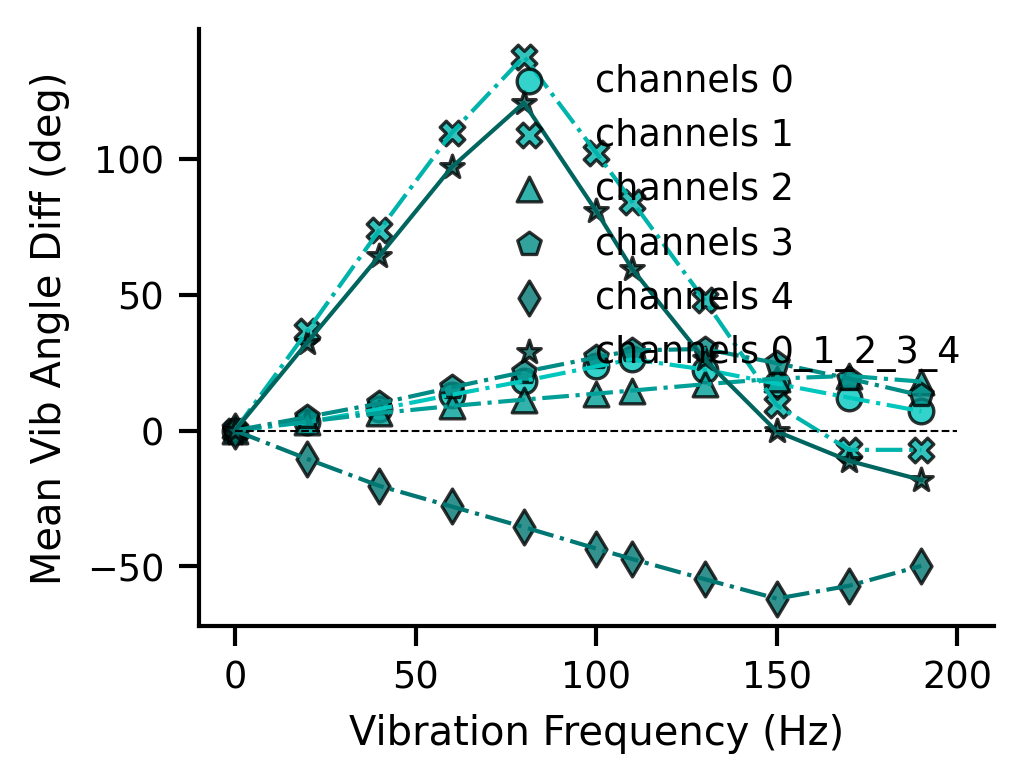

In [15]:
# order channels
channels_order = aff_marker_map.keys()
channels_order_dict = {channel: idx for idx, channel in enumerate(channels_order)}

for vib_muscles_str in vib_m_str_to_plot:
    df_f = df_all[(df_all["vib_muscles_str"] == vib_muscles_str) & (df_all["train_seed"] == train_seed)]
    # sort by channels given channels_order
    df_f = df_f.sort_values(by=["channels"], key=lambda x: x.map(channels_order_dict))
    if "TRI" in vib_muscles_str:
        color = original_hex_tri
    elif "BIC" in vib_muscles_str:
        color = original_hex_biceps
    else:
        color = "gray"
    # plot_angleOffset_vs_vibration(df_f, path_save, color, vib_muscles_str+"_all_chan" +str(channel),"vib_angle_diff_elbow", None)
    # plot_angleOffset_vs_vibration(df_f, path_save, color, vib_muscles_str+"_all_chan" +str(channel),"vib_angle_diff_elbow", "train_seed")
    plot_angleOffset_vs_vibration(df_f, path_save, color, f"seed-{coef_seed}_{vib_muscles_str}_allChan", "vib_angle_diff_elbow", "channels", group_by=["vib_freq"], seed_marker_map=aff_marker_map, ls_map=ls_map)

### Channels response vs vib freq

In [16]:
tricolor = "#00C7BE"
biccolor = "#FF3B30"
trilat_gradient = generate_color_gradient(tricolor)  # Gradient for TRIlat
bcilong_gradient = generate_color_gradient(biccolor)  # Gradient for BIClong


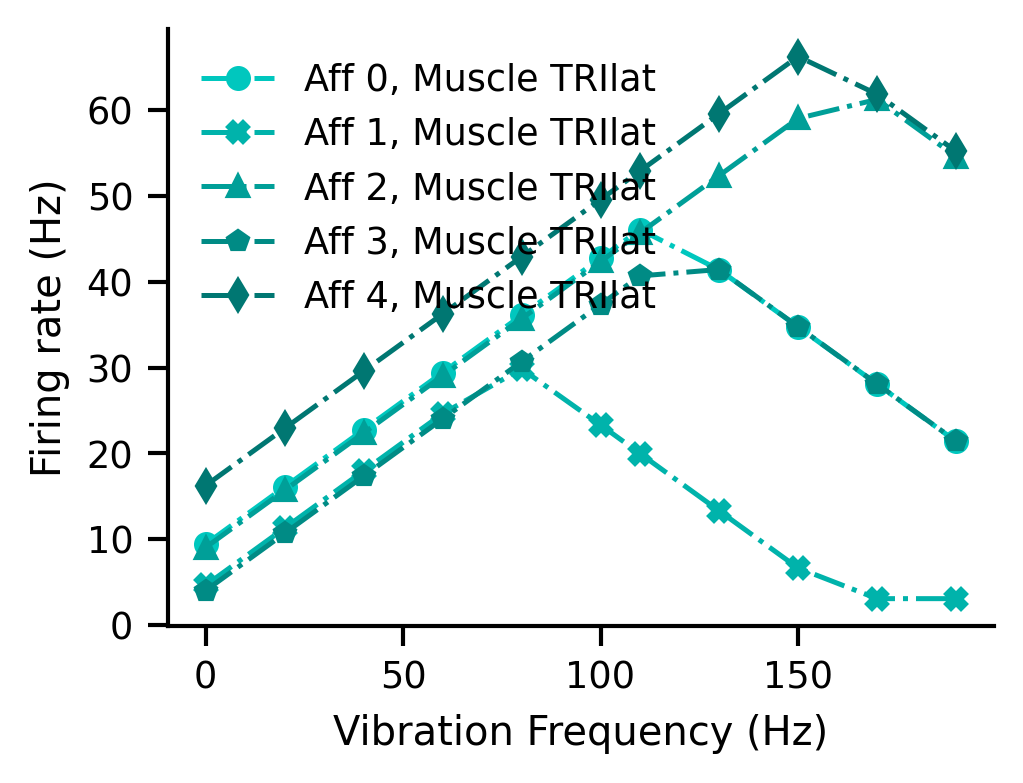

In [17]:
time_point = 500
channels = [0, 1, 2, 3, 4]
muscle_names = ["TRIlat"]
# take only rows with inputs_vib for this example figure
df_all_no_nan = df_all_f.dropna(subset=["inputs_vib"])
df_f = df_all_no_nan[df_all_no_nan["vib_muscles_str"] == muscle_names[0]]
plot_vibration_vs_input(df_f, muscle_names, time_point, channels, per_seed=None, grad_color=original_hex_tri, suffix="seed-" + coef_seed +"_train_seed" + train_seed + "_"+ vib_muscles_str+"_all_chan", save_path=path_save, seed_marker_map=aff_marker_map, ls_map=ls_map)
# muscle_names = ["BIClong"]
# df_f = df_all_noNan[df_all_noNan["vib_muscles_str"] == "BIClong"]
# plot_vibration_vs_input(df_f, muscle_names, time_point, channels, per_seed="coef_seed", grad_color=original_hex_biceps, suffix="all", save_path=path_save)

# Panel B: max rate vs freq of max illusion. All muscles, seed

In [20]:
num_cols = 5
num_vib_muscles = len(vib_muscles)
test_exp_dir = "vib_vary_ia_subChannels"
# load all data for figs
df_file_path = os.path.join(
    SAVE_DIR,
    "data_for_figs", 
    f"df_subChannels_fig-data-withMax_rate_allSeed_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5")

coef_seeds_to_load = ['0', '1', '2', '3','4']
vib_muscles = ["TRIlat", "TRImed", "TRIlong", "BICshort", "BIClong"] # all containing that muscle 
vib_range = "0-190Hz"

## For pre-trained models downloaded
train_seeds_to_load = ['0','1','2','9']
PATH_TO_SAVE = model_path + "/" + "test" + "/" + INPUT_DATA + "/" + test_exp_dir

columns_to_load = ["vib_freq", "vib_muscles", "trial", "elbow_angle", "vib_angle_diff_elbow"]

path_save = model_path + "/plots/" + test_exp_dir
if not os.path.exists(path_save):
    os.makedirs(path_save)
    print("created directory ", path_save)

## Load data

In [21]:
# Use dataframe to load data or from the models if df not available

# if figure data is available, load it
if os.path.exists(df_file_path):
    print("loading df_results_all from ", df_file_path)
    df_results_all = pd.read_hdf(df_file_path, key="df", mode="r")
else:
    ### Loop over seeds otherwise too much data extract the freq of max illusion for each channel
    col_name = "vib_angle_diff_elbow"
    df_results_all = pd.DataFrame()
    for seed in coef_seeds_to_load:
        print(seed)
        df_file_path = os.path.join(
            SAVE_DIR,
            "data_for_figs", 
            f"df_subChannels_fig-data_seed-{seed}_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5"
        )

        loaded_from_hdf = False
        # load data 
        if os.path.exists(df_file_path):
            print("loading df_all from ", df_file_path)
            result_df_seed = pd.read_hdf(df_file_path, key="df", mode="r")
            loaded_from_hdf = True
        else:
            print(test_exp_dir)
            df_all = load_vibration_data(
                model_path=model_path,
                test_exp_dir=test_exp_dir,
                vib_muscles=vib_muscles,
                vib_range=vib_range,
                columns_to_load=columns_to_load,
                coef_seeds_to_load=coef_seeds_to_load,
                train_seeds_to_load=train_seeds_to_load,
                input_data=INPUT_DATA,
                sample_rate=SAMPLE_RATE,
                exact_vib_muscles=True,
                addChannels=True
            )
            ### Check right number of trials per channel for this seed
            # remove rows with same coef_seed, train_seed, vib_musclse_str, vib_freq and trial
            df_all_f = df_all.drop_duplicates(subset=["coef_seed", "train_seed", "vib_muscles_str", "vib_freq", "trial", "channels"], keep="first")

            unique_channels = df_all_f["channels"].unique()
            print(unique_channels)

            for channel in unique_channels:
                print(channel)
                df_all_ff = df_all_f[df_all_f["channels"] == channel]
                summary = summarize_dataframe(df_all_ff)
                trials_per_coef_seed = summary['trials_per_coef_seed'][seed]
                assert trials_per_coef_seed == 22000, f"seed {seed}, channel {channel}, should have 22000 trials per coef seed, but has {trials_per_coef_seed}"
            
            # extract data we want
            mean_by_freq = df_all.groupby(['coef_seed', 'train_seed', 'vib_muscles_str', 'vib_freq', 'channels'])[
                col_name
            ].mean().reset_index()
            mean_by_freq[f'abs_{col_name}'] = mean_by_freq[col_name].abs()
            max_freq_data_channel = []
            for (coef, train, muscle, channel), group_df in mean_by_freq.groupby(['coef_seed', 'train_seed', 'vib_muscles_str', 'channels']):
                # Get frequency at which maximum absolute mean occurs for weighted metric
                dict_results = {
                    'coef_seed': coef,
                    'train_seed': train,
                    'vib_muscles_str': muscle,
                    'channels': channel
                }
                abs_idx = group_df[f'abs_{col_name}'].idxmax()
                freq_max_illusion = group_df.loc[abs_idx, 'vib_freq']
                max_illusion = group_df.loc[abs_idx, col_name]
                dict_results[f'max_{col_name}_freq'] = freq_max_illusion
                dict_results[f'max_{col_name}'] = max_illusion
                    
                max_freq_data_channel.append(dict_results)

            # Create result dataframe
            result_df_seed = pd.DataFrame(max_freq_data_channel)
            
        print(len(result_df_seed))
        df_results_all = pd.concat([df_results_all, result_df_seed], axis=0, ignore_index=True)

        # save df_all to h5 file
        if not loaded_from_hdf:
            df_file_path = model_path + f"/df_subChannels_fig-data_seed-{seed}_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5"
            print("saving df_all to ", df_file_path)
            result_df_seed.to_hdf(df_file_path, key="df", mode="w") 

loading df_results_all from  /media/data16/adriana/ProprioPerception/0_Zenodo/data_for_figs/df_subChannels_fig-data-withMax_rate_allSeed_vib_vary_ia_subChannels_5Muscles_numCols-5.h5


In [24]:
# # remove rows with same coef_seed, train_seed, vib_musclse_str, vib_freq and trial
df_results_all_f = df_results_all.drop_duplicates(subset=["coef_seed", "train_seed", "vib_muscles_str", "channels"], keep="first")
print(len(df_results_all_f))
df = df_results_all_f

# check loaded data is correct 
# summary = {
#         "unique_coef_seeds": sorted(df["coef_seed"].unique().tolist()),
#         "unique_train_seeds": sorted(df["train_seed"].unique().tolist()),
#         "train_seeds_per_coef_seed": df.groupby("coef_seed")["train_seed"]
#         .nunique()
#         .to_dict(),
#         "trials_per_coef_seed": df.groupby("coef_seed").size().to_dict(),
#         "trials_per_train_seed": df.groupby("train_seed").size().to_dict(),
#         "vib_muscles_summary": {},
#         "vib_freq_summary": {},
#     }
# # Count trials per unique combination of coef_seed and train_seed
# summary["trials_per_coef_seed_train_seed"] = (
#     df.groupby(["coef_seed", "train_seed"]).size().to_dict()
# )

# summary["trials_per_coef_seed_train_seed_vib_muscle"] = (
#     df.groupby(["coef_seed", "train_seed", "vib_muscles_str"]).size().to_dict()
# )

# # Vib muscles per coef_seed and train_seed
# vib_muscles_by_seed = (
#     df.groupby(["coef_seed", "train_seed"])["vib_muscles_str"]
#     .apply(lambda x: sorted(set(x)))
#     .to_dict()
# )
# summary["vib_muscles_summary"] = vib_muscles_by_seed

# # Vib frequencies per coef_seed, train_seed, and vib_muscles_str
# channel_summary = (
#     df.groupby(["coef_seed", "train_seed", "vib_muscles_str"])["channels"]
#     .apply(lambda x: sorted(set(x)))
#     .to_dict()
# )
# summary["channel_summary"] = channel_summary
# summary


500


In [25]:
df_results_all = df_results_all_f
unique_seeds = df_results_all["coef_seed"].unique()
unique_seeds.sort()
seed_marker_map = {seed: MARKER_LIST[i] for i, seed in enumerate(unique_seeds)}
df_results_all["vib_muscles_str"].unique()

array(['BIClong', 'BICshort', 'TRIlat', 'TRIlong', 'TRImed'], dtype=object)

In [26]:
path_save

'/media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_ia_subChannels'

In [27]:
# add max rate for each afferent if not already in df_results_all
if "max_rate" not in df_results_all.columns:
    ## add max rate of each channel from coefficients
    import ast
    aff_type = "i_a"
    for seed in coef_seeds_to_load:
        spindle_coefs_dir = f"../../data/extended_spindle_coefficients/{aff_type}/linear"
        coefs_file = f"{spindle_coefs_dir}/coefficients_{aff_type}_5_{seed}.csv"
        # open csv and load values of column "max_rate" for each vib_muscles
        df = pd.read_csv(coefs_file)
        df = df[["muscle_name", "max_rate"]]
        df["max_rate"] = df["max_rate"].apply(ast.literal_eval)
        # add column to df_results_all add values to all the rows with matchi vib_muscles_str and coef_seed
        for muscle in df["muscle_name"].unique():
            max_rates = df[df["muscle_name"] == muscle]["max_rate"].values[0]
            for chan, max_rate in enumerate(max_rates):
                mask = (df_results_all["coef_seed"] == seed) & (df_results_all["vib_muscles_str"] == muscle) & (df_results_all["channels"] == str(chan))
                df_results_all.loc[mask, "max_rate"] = max_rate
else:
    print("max_rate already in df_results_all")

max_rate already in df_results_all


## Plot

In [28]:
# Define individual channels and the combined channel representation
ind_channels = ['0', '1', '2', '3', '4']
all_channels = "0_1_2_3_4"
col_name = "vib_angle_diff_elbow"

Total number of points: 500


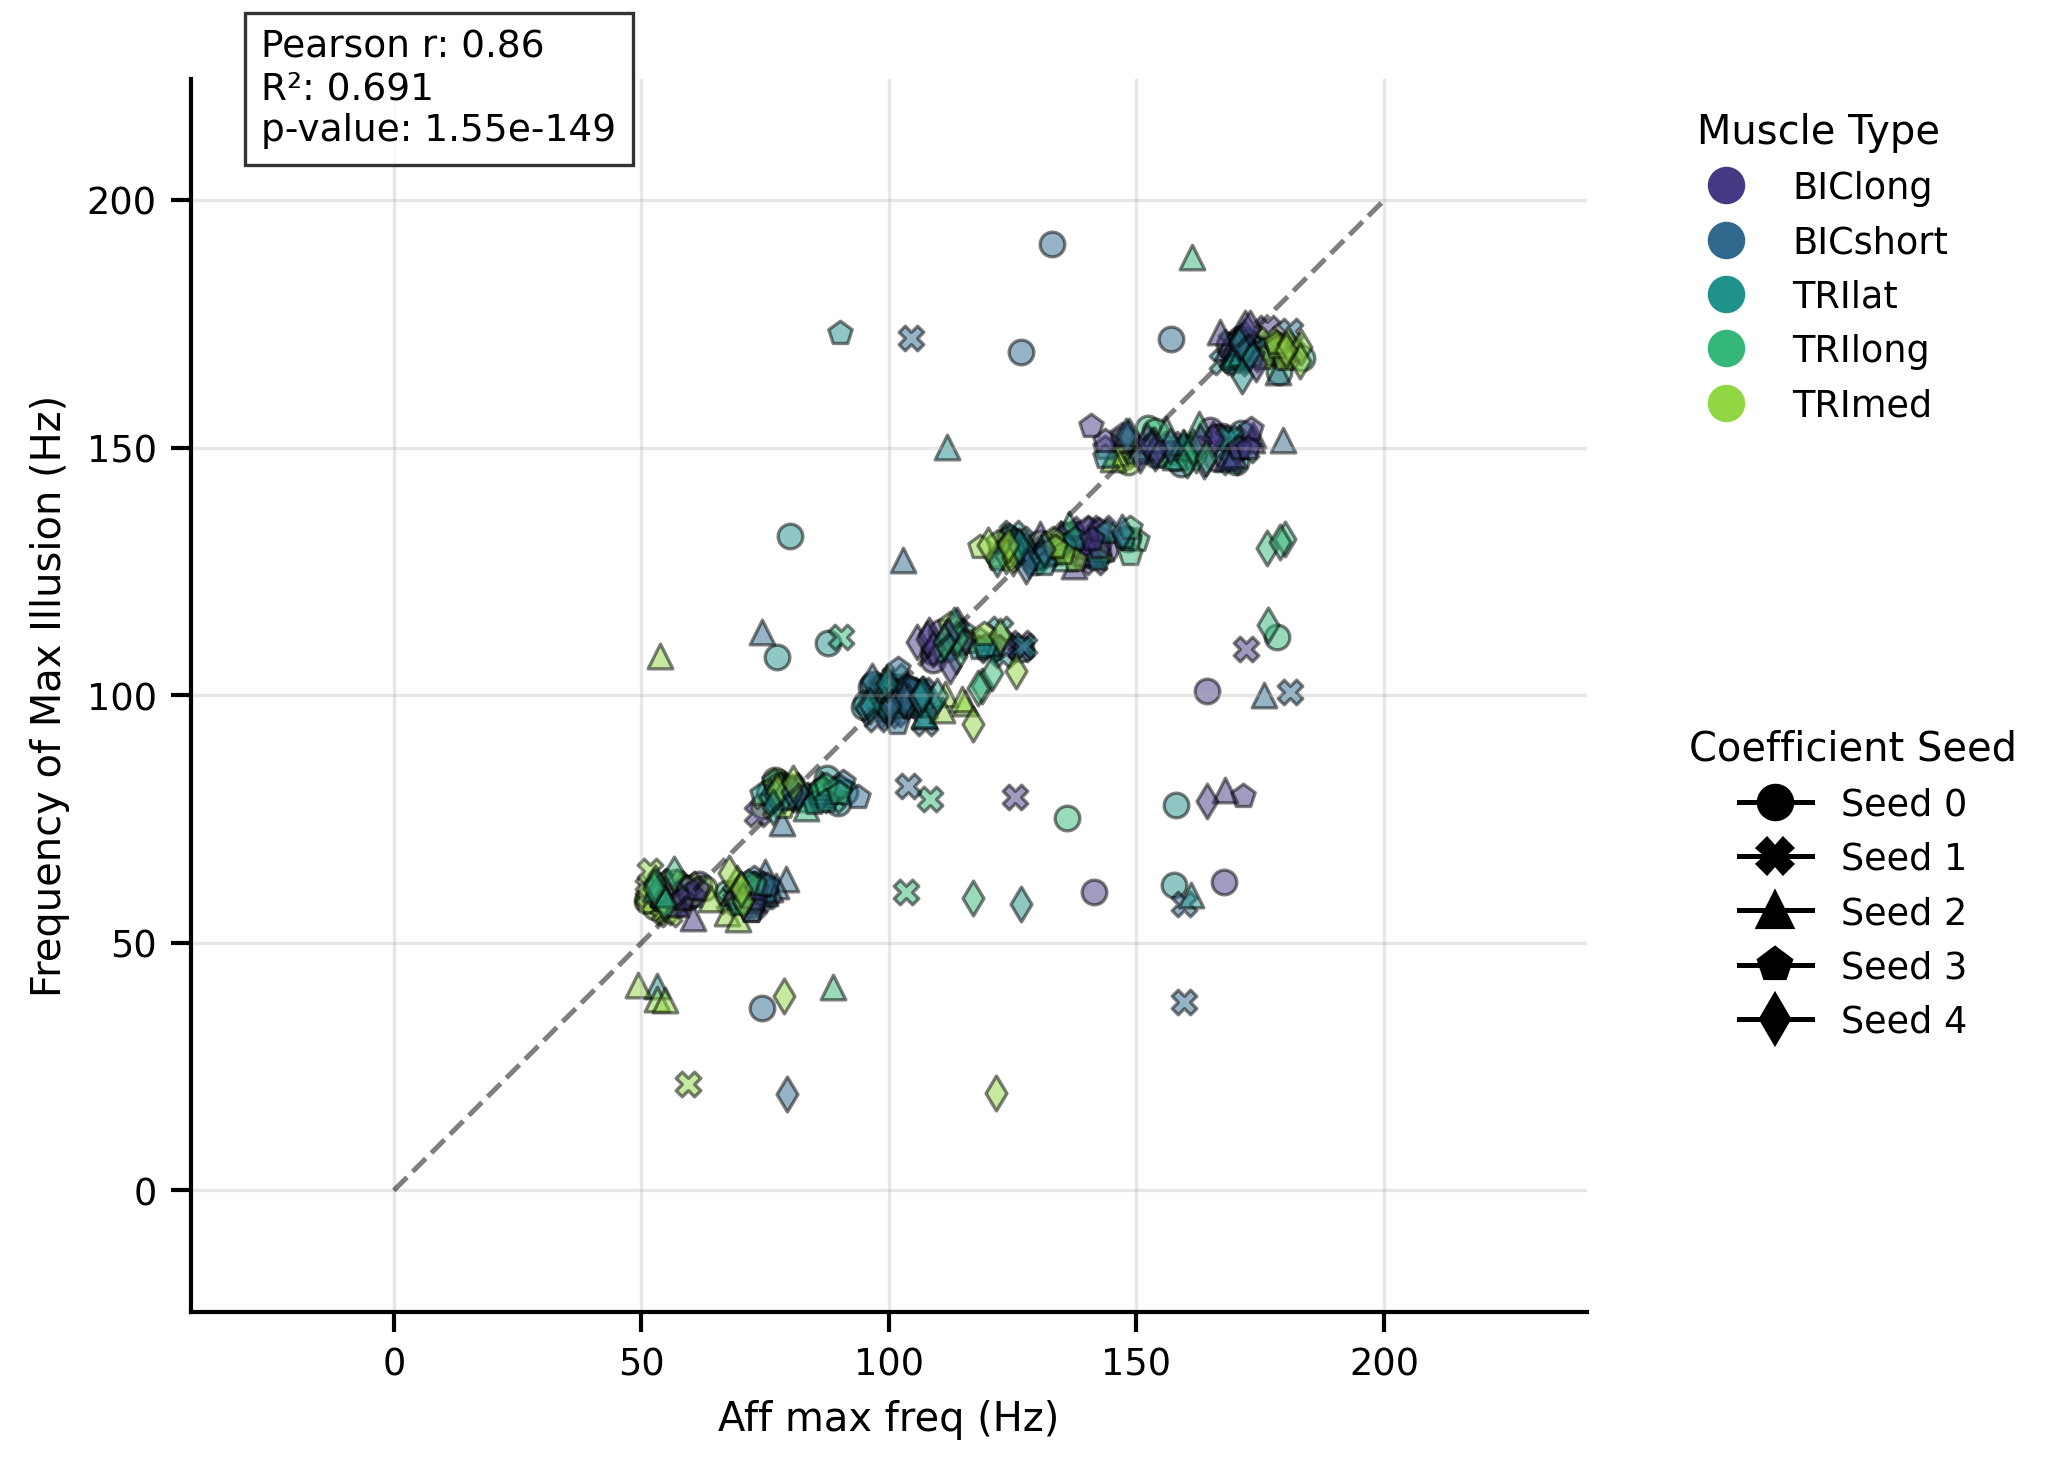

In [30]:
MS = 35
cols_per_afferent = [f"predicted_vibs_channels_{i}" for i in [1]]
cols_per_afferent = [f"predicted_vibs_channels_{i}" for i in range(len(ind_channels))]
# Define jitter strength
jitter_strength = 2  # Adjust as needed

# Define marker styles for coef_seed
markers = ["o", "X", "^", "p", "d", "*"]
unique_coef_seeds = sorted(df_results_all['coef_seed'].unique())
marker_map = {seed: markers[i % len(markers)] for i, seed in enumerate(unique_coef_seeds)}

# Create figure
# plt.figure(figsize=(12, 10))
plt.figure(figsize=BASE_FIG_SIZE_2COL)
# plt.figure(figsize=(12, 10))

# Get unique muscle types for manual color assignment
muscle_types = sorted(df_results_all['vib_muscles_str'].unique())
palette = sns.color_palette("viridis", len(muscle_types))
color_map = {muscle: palette[i] for i, muscle in enumerate(muscle_types)}

# Store all data points for correlation calculation
all_x = []
all_y = []

for coef_seed, group_df in df_results_all.groupby('coef_seed'):
    for train_seed, subgroup in group_df.groupby('train_seed'):
        for muscle, subsubgroup in subgroup.groupby('vib_muscles_str'):
            for channel, subsubsubgroup in subsubgroup.groupby('channels'):  # <-- Fix applied here
                # print(f"Channel: {channel}, Data points: {len(subsubsubgroup)}")

                max_rate_col = f"max_rate"
                freq_col = f'max_{col_name}_freq'

                x_values = subsubsubgroup[max_rate_col] + np.random.normal(0, jitter_strength, size=len(subsubsubgroup))
                y_values = subsubsubgroup[freq_col] + np.random.normal(0, jitter_strength, size=len(subsubsubgroup))

                all_x.extend(x_values)
                all_y.extend(y_values)

                plt.scatter(
                    x_values,
                    y_values,
                    label=f"{muscle} (seed {coef_seed})" if muscle == muscle_types[0] else "_nolegend_",
                    marker=marker_map[coef_seed],
                    s=MS,
                    alpha=0.5,
                    color=color_map[muscle],
                    edgecolors='black'
                )

# Compute correlation statistics
corr_coeff, p_value = pearsonr(all_x, all_y)
r2 = r2_score(all_x, all_y)

# total number of points 
print(f"Total number of points: {len(all_x)}")

# Add diagonal line
min_freq, max_freq = 0, 200
plt.plot([min_freq, max_freq], [min_freq, max_freq], 'k--', alpha=0.5)

# Add correlation statistics text
plt.text(
    0.05, 0.95, 
    f"Pearson r: {corr_coeff:.2f}\nR²: {r2:.3f}\np-value: {p_value:.3g}", 
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8),
    fontsize=9
)

# Create custom legend for muscle types (colors)
muscle_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[m], 
                             markersize=10, label=m) for m in muscle_types]
muscle_legend = plt.legend(handles=muscle_handles, title="Muscle Type", 
                          loc='upper left', bbox_to_anchor=(1.05, 1))
plt.gca().add_artist(muscle_legend)

# Create custom legend for coef_seed (markers)
seed_handles = [plt.Line2D([0], [0], marker=marker_map[s], color='black', 
                          markersize=8, label=f"Seed {s}") for s in unique_coef_seeds]
plt.legend(handles=seed_handles, title="Coefficient Seed", 
           loc='upper left', bbox_to_anchor=(1.05, 0.5))

# Improve aesthetics
# plt.title('Frequency at Maximum Illusion vs Afferent max freq')
plt.xlabel('Aff max freq (Hz)')
plt.ylabel('Frequency of Max Illusion (Hz)')
plt.grid(True, alpha=0.3)

# Set equal aspect ratio
plt.axis('equal')

# Adjust axis limits
plt.xlim(0, 200)
plt.ylim(0, 200)

# Tight layout
plt.tight_layout()

# Show plot
plt.savefig(path_save+f'/freq_max_ill_vs_maxFR_indAff.svg')
plt.savefig(path_save+f'/freq_max_ill_vs_maxFR_indAff.png')
plt.show()
